In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('train.csv', sep = ';')
df_test = pd.read_csv('test.csv', sep = ';')
df_sample = pd.read_csv('sample.csv', sep = ',')
# df_test['selling_price']=df_sample['Expected']
# df_test.drop(columns='id', inplace=True)
# df_test

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [4]:
# objList= df_train.select_dtypes(include='object').columns
# objList
# df_train.dropna(inplace=True)
# X_train=df_train.drop(columns=objList)
# y_train=X_train.pop('selling_price')

In [5]:
df_sample

,Id,Expected
0,1,1000
1,2,2000
2,3,3000
3,4,4000
4,5,5000
...,...,...
2123,2124,2124000
2124,2125,2125000
2125,2126,2126000
2126,2127,2127000


In [6]:
df_test

,id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,81.86 bhp,113.75Nm@ 4000rpm,5.0
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,52.8 bhp,85Nm@ 2500rpm,5.0
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0


In [7]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


In [8]:
def Feature_Engineering(df):
    df=df.dropna()
    cols_str=['mileage', 'engine', 'max_power']
    for col in cols_str:
        df[col]=df[col].apply(lambda x: float(re.findall(r"\d+\.\d+|\d+",str(x))[0]))

    df['Nm']=df.torque.apply(lambda x: float(re.findall(r"\d+\.\d+|\d+",str(x))[0]))

    def find_rpm(x):
        l=re.findall(r"\d+\.\d+|\d+",str(x).replace(',','.'))
        l=[float(x) for x in l]
        return l[-1]
#         if len(l)==2:
#             return l[-1]
#         else:
#             return np.array(l[1:]).mean()
    df['rpm']=df.torque.apply(lambda x: float(re.findall(r"\d+\.\d+|\d+",str(x))[-1]))


#     df['brand']=df.name.apply(lambda x: str(x).split(' ')[0])

    objList= df.select_dtypes(include='object')
    df.year=2022-df.year
    df.drop(columns=['torque',], inplace=True)
    df.dropna(inplace=True)
    X=df.copy()
    y=X.pop('selling_price')
    
    return X, y




In [9]:

X_train, y_train = Feature_Engineering(df_train)
# X_test, y_test= Feature_Engineering(df_test)


/tmp/ipykernel_4108/3662057462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].apply(lambda x: float(re.findall(r"\d+\.\d+|\d+",str(x))[0]))
/tmp/ipykernel_4108/3662057462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nm']=df.torque.apply(lambda x: float(re.findall(r"\d+\.\d+|\d+",str(x))[0]))
/tmp/ipykernel_4108/3662057462.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [10]:
objList= X_train.select_dtypes(include='object')

for feat in objList:
    le = LabelEncoder()
    X_train[feat] = le.fit_transform(X_train[feat])
#     X_test[feat] = le.transform(X_test[feat])
# min_max_scaler=MinMaxScaler()
# X_train=min_max_scaler.fit_transform(X_train)
# X_test=min_max_scaler.transform(X_test)

In [11]:
X_train.describe()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Nm,rpm
count,5840.000000,5840.000000,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,890.203425,8.010445,6.944431e+04,1.881507,0.891610,0.868493,0.792123,19.389591,1464.471404,91.663609,5.429110,169.304969,2940.177397
std,465.879369,3.852886,5.215208e+04,1.001455,0.395294,0.337983,1.206936,4.054167,508.287421,35.898104,0.976575,98.035812,1055.746601
min,0.000000,2.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,624.000000,32.800000,2.000000,4.800000,0.000000
25%,520.000000,5.000000,3.500000e+04,1.000000,1.000000,1.000000,0.000000,16.780000,1197.000000,68.050000,5.000000,102.000000,2200.000000
50%,920.000000,7.000000,6.000000e+04,1.000000,1.000000,1.000000,0.000000,19.300000,1248.000000,82.000000,5.000000,160.000000,2800.000000
75%,1202.000000,10.000000,9.662500e+04,3.000000,1.000000,1.000000,2.000000,22.320000,1582.000000,102.000000,5.000000,205.000000,4000.000000
max,1739.000000,28.000000,1.500000e+06,3.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,400.000000,14.000000,789.000000,5200.000000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(   X_train, y_train, test_size=0.1, random_state=112)

In [13]:
X_test

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Nm,rpm
2859,198,14,200185,3,1,1,0,16.60,1388.0,68.00,5.0,16.3,0.0
3409,963,4,10000,3,0,0,0,23.10,998.0,67.04,5.0,90.0,3500.0
51,1106,14,70000,3,1,1,1,17.50,1298.0,85.80,5.0,114.0,4000.0
138,358,15,90000,3,1,0,0,12.90,1799.0,130.00,5.0,172.0,4300.0
1258,933,4,38817,1,0,1,0,27.39,1248.0,74.00,5.0,190.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,506,12,120000,1,1,1,2,11.80,1991.0,150.00,5.0,32.1,2000.0
429,1176,11,90000,3,1,1,2,18.90,998.0,67.10,5.0,90.0,3500.0
4403,377,6,56494,3,2,1,0,18.20,1199.0,88.70,5.0,110.0,4800.0
2614,1652,7,120000,1,1,1,0,12.99,2494.0,100.60,7.0,200.0,3400.0


<AxesSubplot:>

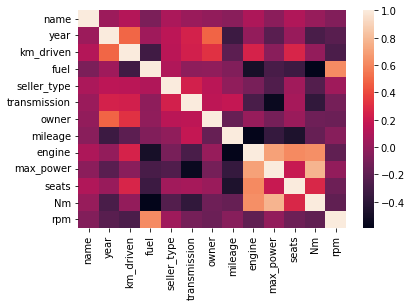

In [14]:
sns.heatmap(X_train.corr())

In [15]:
LR=LinearRegression()
LR=LR.fit(X_train,y_train)
RF=RandomForestRegressor(criterion='mse')
RF=RF.fit(X_train,y_train,)

/home/huynv/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [16]:
print('LR train: ',LR.score(X_train, y_train))
print('LR test: ',LR.score(X_test, y_test))

print('RF train: ',RF.score(X_train, y_train) )    
print('RF test: ',RF.score(X_test, y_test))  

LR train:  0.6901703701753634
LR test:  0.6619296480143917
RF train:  0.9953926234124606
RF test:  0.9727617026036738


In [20]:
y_LR_pre=LR.predict(X_test)
y_RF_pre=RF.predict(X_test)

In [21]:

print('LR: ',mean_absolute_error(y_test, y_LR_pre))
print('RF: ',mean_absolute_error(y_test, y_RF_pre))

LR:  264916.406201367
RF:  66324.47127320083


In [22]:
X_test

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Nm,rpm
2859,198,14,200185,3,1,1,0,16.60,1388.0,68.00,5.0,16.3,0.0
3409,963,4,10000,3,0,0,0,23.10,998.0,67.04,5.0,90.0,3500.0
51,1106,14,70000,3,1,1,1,17.50,1298.0,85.80,5.0,114.0,4000.0
138,358,15,90000,3,1,0,0,12.90,1799.0,130.00,5.0,172.0,4300.0
1258,933,4,38817,1,0,1,0,27.39,1248.0,74.00,5.0,190.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,506,12,120000,1,1,1,2,11.80,1991.0,150.00,5.0,32.1,2000.0
429,1176,11,90000,3,1,1,2,18.90,998.0,67.10,5.0,90.0,3500.0
4403,377,6,56494,3,2,1,0,18.20,1199.0,88.70,5.0,110.0,4800.0
2614,1652,7,120000,1,1,1,0,12.99,2494.0,100.60,7.0,200.0,3400.0
